In [1]:
from quests_data import *
import seaborn as sns
import itertools
from ase import Atoms
from ase.io import read, write
from quests.tools.plotting import savefig, COLORS
from scipy import stats

In [2]:
def get_rmse(A, B):
    return np.sqrt(((A - B) ** 2).mean())

## Loading the data of $\delta \mathcal{H}$ values and computing the entropy

In [3]:
ROOT_DH = "../data/02-GAP20/dH"

def load_dH(name_1, name_2=None, root_dir=ROOT_DH):
    if name_2 is None:
        name_2 = name_1
        
    fname = os.path.join(root_dir, f"{name_1}-{name_2}.json")
    with open(fname, "r") as f:
        dH = json.load(f)["delta_entropy"]

    return np.array(dH)

In [4]:
ALL_MODELS = [
    "Amorphous_Bulk",
    "Amorphous_Surfaces",
    "Crystalline_Bulk",
    "Crystalline_RSS",
    "Defects",
    "Diamond",
    "Dimer",
    "Fullerenes",
    "Graphene",
    "Graphite",
    "Graphite_Layer_Sep",
    "LD_Iter1",
    "Liquid",
    "Liquid_Interface",
    "Nanotubes",
    "SACADA",
    "Single_Atom",
    "Surfaces",
]

In [5]:
MODELS = [
    "Graphene",
    "Diamond",
    "Graphite",
    "Nanotubes",
    "Fullerenes",
    "Defects",
    "Surfaces",
    "Liquid",
    "Amorphous_Bulk",
]
ROOT = "../data/02-GAP20/model-eval"

df = []
for name in ALL_MODELS:
    dH = load_dH(name)
    logn = np.log(len(dH))
    entropy = logn + dH.mean()

    df.append({
        "dset": name,
        "logn": logn,
        "H": entropy
    })

df = pd.DataFrame(df)

## Plotting dataset entropies + max entropy

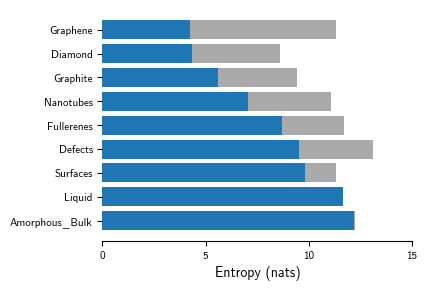

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))

_data = df.sort_values("H").set_index("dset").loc[MODELS]

y = np.arange(len(_data), 0, -1)
ax.barh(y, _data["H"])
ax.barh(y, _data["logn"], color="#aaaaaa", zorder=-1)
ax.set_yticks(y)
ax.set_yticklabels(_data.index)
ax.set_xticks([0, 5, 10, 15])

ax.set_xlabel("Entropy (nats)")
ax.spines["left"].set_visible(False)
# savefig(fig, "04-gap20-entropy.pdf")
plt.show()

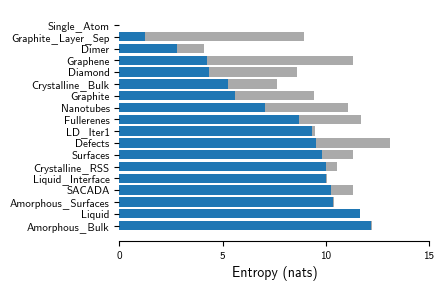

In [7]:
fig, ax = plt.subplots(figsize=(4, 3))

_data = df.sort_values("H").set_index("dset")

y = np.arange(len(_data), 0, -1)
ax.barh(y, _data["H"])
ax.barh(y, _data["logn"], color="#aaaaaa", zorder=-1)
ax.set_yticks(y)
ax.set_yticklabels(_data.index)
ax.set_xticks([0, 5, 10, 15])

ax.set_xlabel("Entropy (nats)")
ax.spines["left"].set_visible(False)
# savefig(fig, "04-gap20-entropy.pdf")
plt.show()

## $\delta \mathcal{H}$ for graphene and nanotubes

In [8]:
grnt = load_dH("Graphene", "Nanotubes")
ntgr = load_dH("Nanotubes", "Graphene")

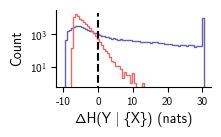

In [9]:
fig, ax = plt.subplots(figsize=(2.0, 1.0))

bins = np.linspace(-10.0, 30.5, 71)

ax.hist(ntgr.clip(max=30.5), bins=bins, label="ΔH(NT | GR)", histtype="step", color=COLORS["bcc"], density=False)
ax.hist(grnt.clip(max=30.5), bins=bins, label="ΔH(GR | NT)", histtype="step", color=COLORS["hcp"], density=False)

ax.plot([0, 0], [0, 20000], "k--")

ax.set_ylabel("Count")
ax.set_xlabel("ΔH(Y | {X}) (nats)")
ax.set_yscale("log")

# ax.legend(frameon=False)
ax.set_xticks([-10, 0, 10, 20, 30])

# savefig(fig, "04-gap20-dH-hist.pdf")
plt.show()